In [1]:
import sys
print("Python version: {}".format(sys.version))

import pandas as pd
print("pandas version: {}".format(pd.__version__))

import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))

import numpy as np
print("numpy version: {}".format(np.__version__))

import scipy as sp
print("scipy version: {}".format(sp.__version__))

import IPython
print("IPython version: {}".format(IPython.__version__))

import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))

import matplotlib.pyplot as plt
from IPython import display
import mglearn

Python version: 2.7.10 (default, Jul 15 2017, 17:16:57) 
[GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.31)]
pandas version: 0.23.3
matplotlib version: 2.2.2
numpy version: 1.14.5
scipy version: 1.1.0
IPython version: 5.7.0
scikit-learn version: 0.19.2


X.shape: (26, 2)


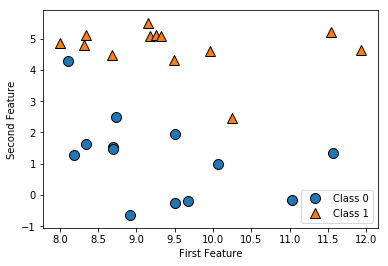

In [2]:
import sklearn

X, y = mglearn.datasets.make_forge()

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First Feature")
plt.ylabel("Second Feature")
print("X.shape: {}".format(X.shape))

Text(0,0.5,'Target')

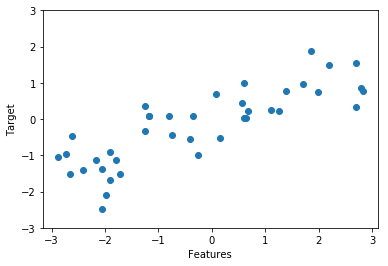

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Features")
plt.ylabel("Target")

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
['target_names', 'data', 'target', 'DESCR', 'feature_names']


In [5]:
print("shape of breast cancer data: {}".format(cancer.data.shape))

shape of breast cancer data: (569, 30)


In [6]:
print("sample numbers of each class:\n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

sample numbers of each class:
{'benign': 357, 'malignant': 212}


In [7]:
print("Feature name:\n{}".format(cancer.feature_names))

Feature name:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


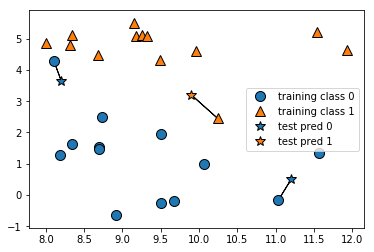

In [8]:
# k-NN algorithm
mglearn.plots.plot_knn_classification(n_neighbors=1)

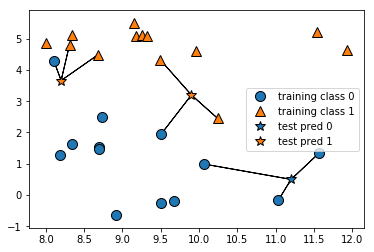

In [9]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [10]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [12]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [13]:
print("predict test set: {}".format(clf.predict(X_test)))

predict test set: [1 0 1 0 1 0 0]


In [14]:
print("Accuracy of test set: {}".format(clf.score(X_test, y_test)))

Accuracy of test set: 0.857142857143


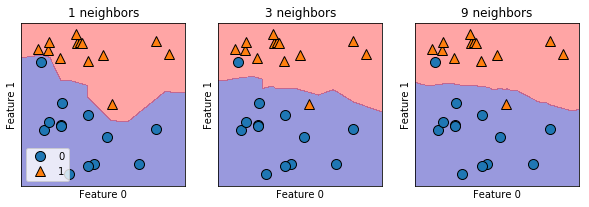

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbors".format(n_neighbors))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend(loc=3)

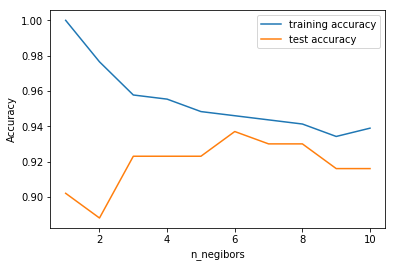

In [16]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# 1에서 10까지 n_neighbors 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # save accuracy of train set
    training_accuracy.append(clf.score(X_train, y_train))
    # save generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_negibors")
plt.legend()

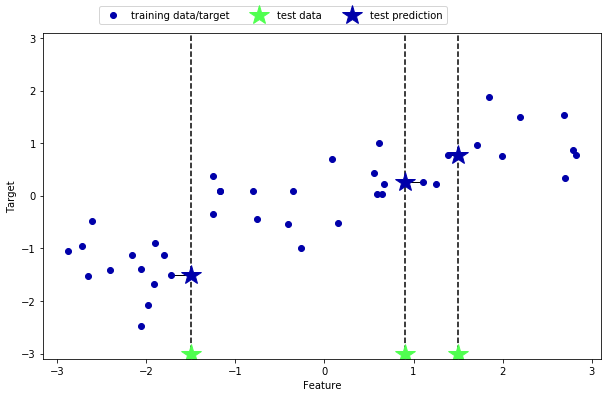

In [17]:
# Regression
mglearn.plots.plot_knn_regression(n_neighbors=1)

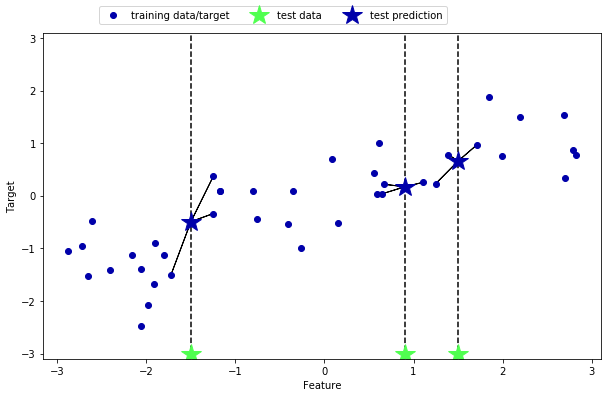

In [18]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [19]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split wave dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 하여 모델의 객체를 생성
reg = KNeighborsRegressor(n_neighbors=3)
# 훈련 데이터와 타깃을 사용해 모델을 학습
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [20]:
print("predict test set:\n{}".format(reg.predict(X_test)))

predict test set:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [21]:
print("test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

test set R^2: 0.83


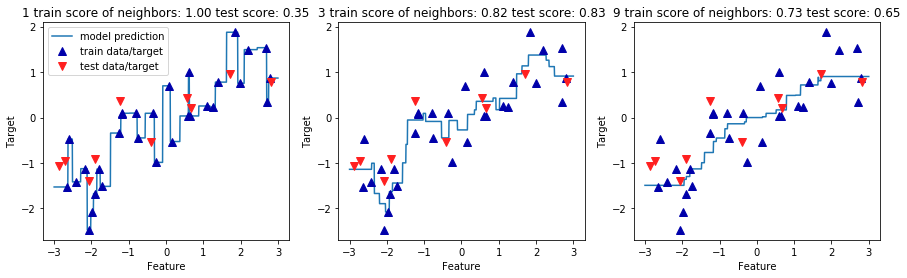

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# make 1000 data points in (-3, 3)
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    #predict using 1, 3, 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
        "{} train score of neighbors: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["model prediction", "train data/target", "test data/target"], loc="best")

# Linear Regression

/Users/Jmmmmu/tensorflow/lib/python2.7/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


w[0]: 0.393906  b: -0.031804


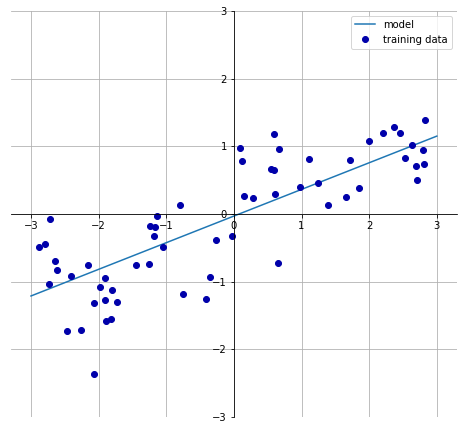

In [23]:
mglearn.plots.plot_linear_regression_wave()

In [24]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [25]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.0318043430268


In [26]:
print("train set score: {:.2f}".format(lr.score(X_train, y_train)))
print("test set score: {:.2f}".format(lr.score(X_test, y_test)))

train set score: 0.67
test set score: 0.66


In [27]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [28]:
print("train set score: {:.2f}".format(lr.score(X_train, y_train)))
print("test set score: {:.2f}".format(lr.score(X_test, y_test)))

train set score: 0.95
test set score: 0.61


# Ridge Regression

In [29]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("train set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("test set score: {:.2f}".format(ridge.score(X_test, y_test)))

train set score: 0.89
test set score: 0.75


In [30]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("train set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

train set score: 0.79
test set score: 0.64


In [31]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("train set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

train set score: 0.93
test set score: 0.77


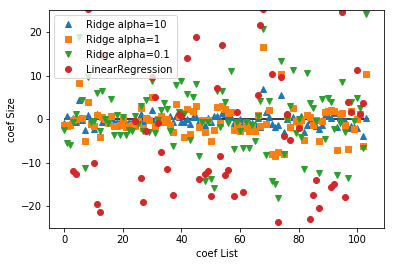

In [32]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("coef List")
plt.ylabel("coef Size")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

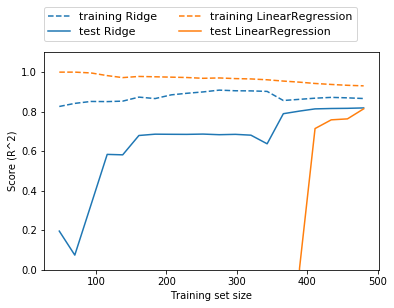

In [33]:
mglearn.plots.plot_ridge_n_samples()

## Lasso

In [34]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("train set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("number of used feature: {}".format(np.sum(lasso.coef_ != 0)))

train set score: 0.29
test set score: 0.21
number of used feature: 4


In [35]:
# "max_iter" 기본값을 증가시키지 않으면 max_iter 값을 늘리라는 경고 발생
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("train set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("number of used feature: {}".format(np.sum(lasso001.coef_ != 0)))

train set score: 0.90
test set score: 0.77
number of used feature: 33


In [36]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("train set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("number of used feature: {}".format(np.sum(lasso00001.coef_ != 0)))

train set score: 0.95
test set score: 0.64
number of used feature: 94


Text(0,0.5,'coef Size')

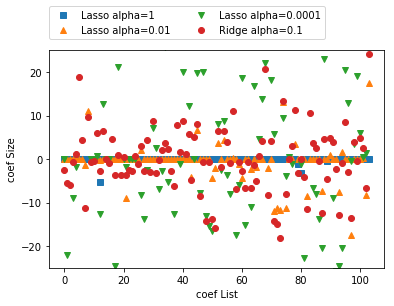

In [37]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("coef List")
plt.ylabel("coef Size")

# Linear Model for Classification

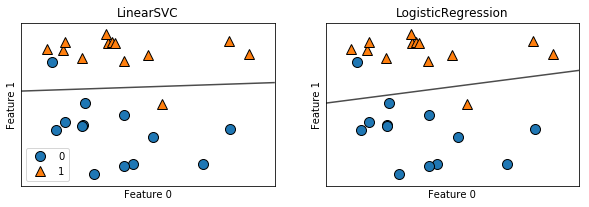

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

x, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(x, y)
    mglearn.plots.plot_2d_separator(clf, x, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(x[:, 0], x[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

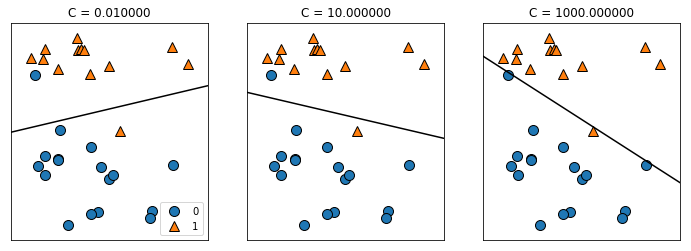

In [39]:
mglearn.plots.plot_linear_svc_regularization()

In [40]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(x_train, y_train) # C = 100(default)
print("train set score: {:.3f}".format(logreg.score(x_train, y_train)))
print("test set score: {:.3f}".format(logreg.score(x_test, y_test)))

train set score: 0.953
test set score: 0.958


In [41]:
logreg100 = LogisticRegression(C=100).fit(x_train, y_train)
print("train set score: {:.3f}".format(logreg100.score(x_train, y_train)))
print("test set score: {:.3f}".format(logreg100.score(x_test, y_test)))

train set score: 0.974
test set score: 0.965


In [42]:
logreg001 = LogisticRegression(C=0.01).fit(x_train, y_train)
print("train set score: {:.3f}".format(logreg001.score(x_train, y_train)))
print("test set score: {:.3f}".format(logreg001.score(x_test, y_test)))

train set score: 0.934
test set score: 0.930


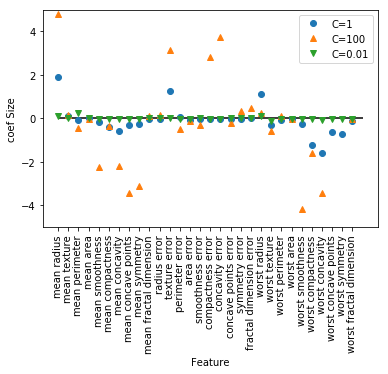

In [43]:
plt.plot(logreg.coef_.T, 'o', label='C=1')
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("coef Size")
plt.legend()

train accuracy of Logistic Regression for C=0.001: 0.91
test accuracy of Logistic Regression for C=0.001: 0.92
train accuracy of Logistic Regression for C=1.000: 0.96
test accuracy of Logistic Regression for C=1.000: 0.96
train accuracy of Logistic Regression for C=100.000: 0.99
test accuracy of Logistic Regression for C=100.000: 0.98


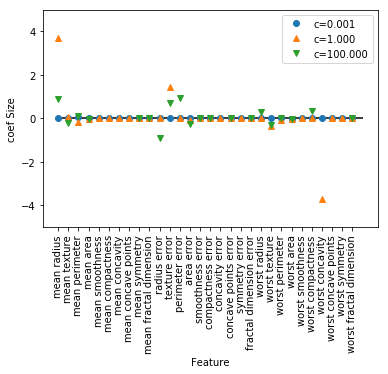

In [44]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(x_train, y_train)
    print("train accuracy of Logistic Regression for C={:.3f}: {:.2f}".format(C, lr_l1.score(x_train, y_train)))
    print("test accuracy of Logistic Regression for C={:.3f}: {:.2f}".format(C, lr_l1.score(x_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="c={:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Feature")
plt.ylabel("coef Size")

plt.ylim(-5, 5)
plt.legend()

# Linear Model for Multiclass

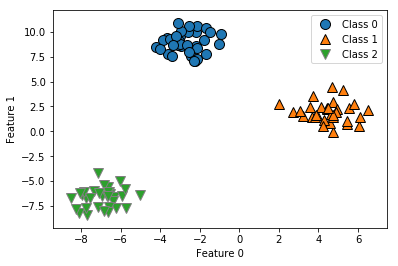

In [45]:
from sklearn.datasets import make_blobs

x, y = make_blobs(random_state=42)
mglearn.discrete_scatter(x[:, 0], x[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [46]:
linear_svm = LinearSVC().fit(x, y)
print("size of coefficient array: ", linear_svm.coef_.shape)
print("size of intercept array: ", linear_svm.intercept_.shape)

('size of coefficient array: ', (3, 2))
('size of intercept array: ', (3,))


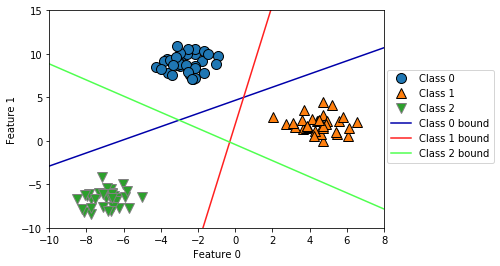

In [47]:
mglearn.discrete_scatter(x[:, 0], x[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Class 0 bound', 'Class 1 bound', 'Class 2 bound'], loc=(1.01, 0.3))

Text(0,0.5,'Feature 1')

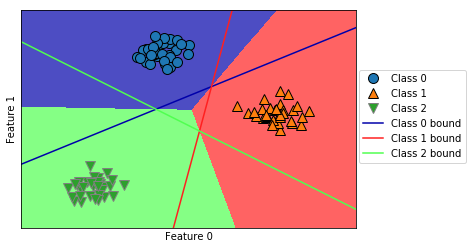

In [48]:
mglearn.plots.plot_2d_classification(linear_svm, x, fill=True, alpha=.7)
mglearn.discrete_scatter(x[:, 0], x[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Class 0 bound', 'Class 1 bound', 'Class 2 bound'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# Naive Bayes

In [49]:
x = np.array([[0, 1, 0, 1], [1, 0, 1, 1], [0, 0, 0, 1], [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [50]:
counts = {}
for label in np.unique(y):
    # 클래스마다 반복
    # 특성마다 1이 나타난 횟수를 센다.
    counts[label] = x[y==label].sum(axis=0)
print("Feature count:\n{}".format(counts))

Feature count:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


# Decision Tree

In [51]:
#mglearn.plots.plot_animal_tree()

In [52]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train, y_train)
print("train set accuracy: {:.3f}".format(tree.score(x_train, y_train)))
print("test set accuracy: {:.3f}".format(tree.score(x_test, y_test)))

train set accuracy: 1.000
test set accuracy: 0.937


In [53]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(x_train, y_train)

print("train set accuracy: {:.3f}".format(tree.score(x_train, y_train)))
print("test set accuracy: {:.3f}".format(tree.score(x_test, y_test)))

train set accuracy: 0.988
test set accuracy: 0.951


In [54]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["Negative", "Positive"], feature_names=cancer.feature_names, impurity=False, filled=True)

In [55]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
#display(graphviz.Source(dot_graph))

In [56]:
print("Feature importance:\n{}".format(tree.feature_importances_))

Feature importance:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


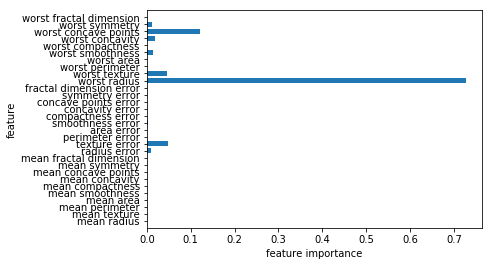

In [57]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


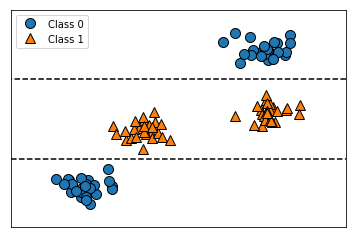

In [58]:
tree = mglearn.plots.plot_tree_not_monotone()
#display(tree)

Text(0,0.5,'price ($/Mbyte_')

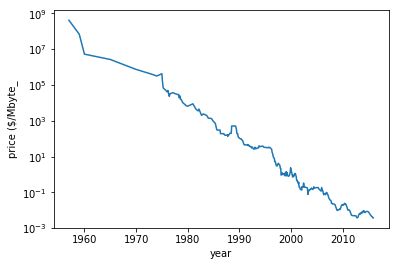

In [59]:
import os
import pandas as pd
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("year")
plt.ylabel("price ($/Mbyte_")

In [60]:
from sklearn.tree import DecisionTreeRegressor
# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만듭니다.
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# use only date feature to predict price
x_train = data_train.date[:, np.newaxis]
# change into log scale to make the relationship between data and target simple
y_train = np.log(data_train.price)

# 예측은 전체 기간에 대해서 수행합니다.
x_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(x_all)
pred_lr = linear_reg.predict(x_all)

# return log scale of predicted value
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

AttributeError: 'Source' object has no attribute 'predict'

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

x, y = make_moons(n_samples=100, noise=0.25, random_state=3)
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(x_train, y_train)

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(x, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, x, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(x[:, 0], x[:, 1], y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(x_train, y_train)

print("test set accuracy: {:.3f}".format(forest.score(x_train, y_train)))
print("test sete accuracy: {:.3f}".format(forest.score(x_test, y_test)))

In [61]:
plot_feature_importances_cancer(forest)

NameError: name 'forest' is not defined

# Gradient Boosting Regression Tree

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(x_train, y_train)

print("train set accuracy: {:.3f}".format(gbrt.score(x_train, y_train)))
print("test set accuracy: {:.3f}".format(gbrt.score(x_test, y_test)))

train set accuracy: 1.000
test set accuracy: 0.958


In [63]:
# to avoid overfitting
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(x_train, y_train)

print("train set accuracy: {:.3f}".format(gbrt.score(x_train, y_train)))
print("test set accuracy: {:.3f}".format(gbrt.score(x_test, y_test)))

train set accuracy: 0.991
test set accuracy: 0.972


In [64]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(x_train, y_train)

print("train set accuracy: {:.3f}".format(gbrt.score(x_train, y_train)))
print("test set accuracy: {:.3f}".format(gbrt.score(x_test, y_test)))

train set accuracy: 0.988
test set accuracy: 0.965


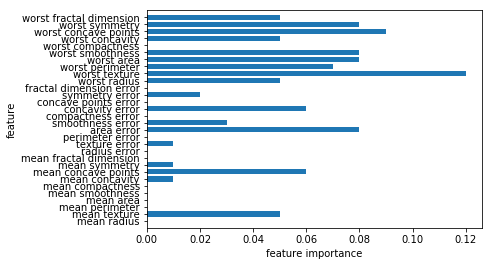

In [65]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(x_train, y_train)

plot_feature_importances_cancer(gbrt)

# Kernelized Support Vector Machines (SVM)

Text(0,0.5,'Feature 1')

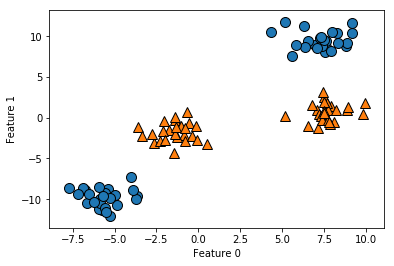

In [66]:
x, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(x[:, 0], x[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0,0.5,'Feature 1')

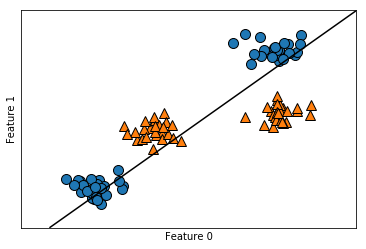

In [67]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(x, y)

mglearn.plots.plot_2d_separator(linear_svm, x)
mglearn.discrete_scatter(x[:, 0], x[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0.5,0,'Feature 1 ** 2')

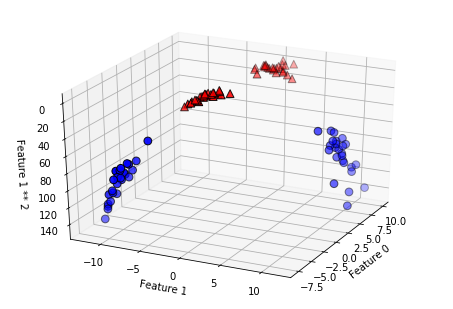

In [68]:
# 두 번째 특성을 제곱하여 추가
x_new = np.hstack([x, x[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()

# 3-dimensional graph
ax = Axes3D(figure, elev=-152, azim=-26)
# draw points such that y==0 first, and then y==1
mask = y == 0
ax.scatter(x_new[mask, 0], x_new[mask, 1], x_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(x_new[~mask, 0], x_new[~mask, 1], x_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature 1 ** 2")

AttributeError: Unknown property degecolor

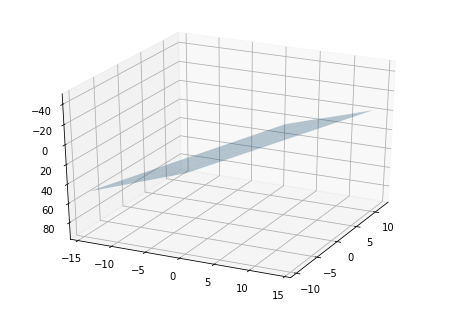

In [69]:
# python version problem
linear_svm_3d = LinearSVC().fit(x_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# 선형 결정 경계 그리기
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(x_new[:, 0].min() - 2, x_new[:, 0].max() + 2, 50)
yy = np.linspace(x_new[:, 1].min() - 2, x_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(x_new[mask, 0], x_new[mask, 1], x_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, degecolor='k')
ax.scatter(x_new[~mask, 0], x_new[~mask, 1], x_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature 1 ** 2")

In [ ]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(x[x:, 0], x[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0,0.5,'Feature 1')

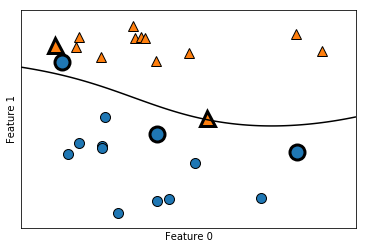

In [70]:
from sklearn.svm import SVC
x, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(x, y)
mglearn.plots.plot_2d_separator(svm, x, eps=.5)
mglearn.discrete_scatter(x[:, 0], x[:, 1], y)

# support vector
sv = svm.support_vectors_
# dual_coef_의 부호에 의해 서포트 벡터의 클래스 레이블이 결정
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

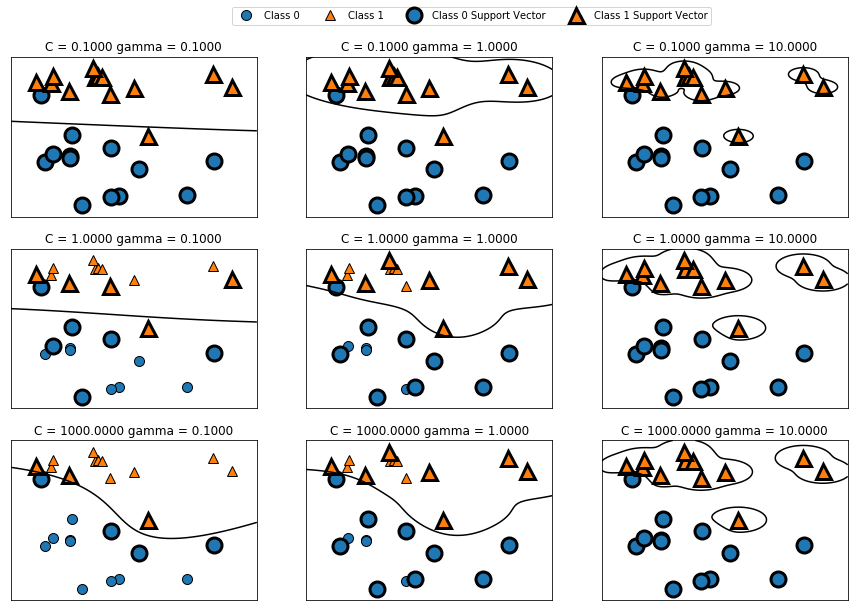

In [71]:
# change parameters
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["Class 0", "Class 1", "Class 0 Support Vector", "Class 1 Support Vector"], ncol=4, loc=(.9, 1.2))

In [72]:
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(x_train, y_train)

print("train set accuracy: {:.2f}".format(svc.score(x_train, y_train)))
print("test set accuracy: {:.2f}".format(svc.score(x_test, y_test))) # overfitted

train set accuracy: 1.00
test set accuracy: 0.63


Text(0,0.5,'Feature size')

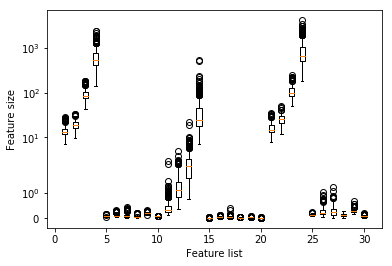

In [73]:
plt.boxplot(x_train, manage_xticks=False)
plt.yscale("symlog")
plt.xlabel("Feature list")
plt.ylabel("Feature size")

In [74]:
# 훈련 세트에서 특성별 최솟값 계산
min_on_training = x_train.min(axis=0)
# 훈련 세트에서 특성별 (최댓값 - 최솟값) 범위 계산
range_on_training = (x_train - min_on_training).max(axis=0)

# 훈련 데이터에 최솟값을 빼고 범위로 나누면, 각 특성에 대해 최솟값은 0, 최댓값은 1
x_train_scaled = (x_train - min_on_training) / range_on_training
print("특성별 최소 값\n{}".format(x_train_scaled.min(axis=0)))
print("특성별 최대 값\n{}".format(x_train_scaled.max(axis=0)))

특성별 최소 값
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최대 값
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [75]:
x_test_scaled = (x_test - min_on_training) / range_on_training

svc = SVC()
svc.fit(x_train_scaled, y_train)

print("train set accuracy: {:.3f}".format(svc.score(x_train_scaled, y_train)))
print("test set accuracy: {:.3f}".format(svc.score(x_test_scaled, y_test)))

train set accuracy: 0.948
test set accuracy: 0.951


In [76]:
# make model more complicated
svc = SVC(C=1000)
svc.fit(x_train_scaled, y_train)

print("train set accuracy: {:.3f}".format(svc.score(x_train_scaled, y_train)))
print("test set accuracy: {:.3f}".format(svc.score(x_test_scaled, y_test)))

train set accuracy: 0.988
test set accuracy: 0.972


# Neural Network (Deep Learning)

In [77]:
#display(mglearn.plots.plot_logistic_regression_graph())
#display(mglearn.plots.plot_single_hidden_layer_graph())

Text(0,0.5,'relu(x), tanh(x)')

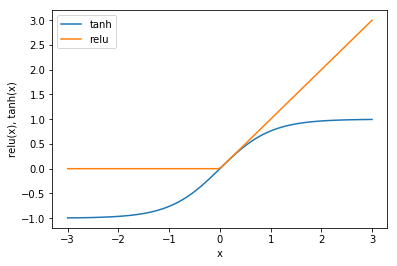

In [78]:
# after calculate the sum of weights, apply it to ReLU or Hyperbolic Tangent
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

In [79]:
#mglearn.plots.plot_two_hidden_layer_graph()

## MLPClassifier

Text(0,0.5,'Feature 1')

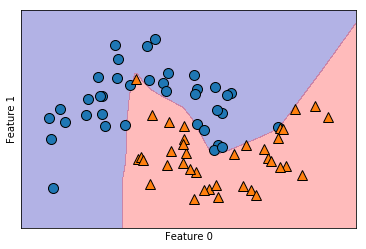

In [80]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

x, y = make_moons(n_samples=100, noise=0.25, random_state=3)

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(x_train, y_train) # hidden unit == 100
mglearn.plots.plot_2d_separator(mlp, x_train, fill=True, alpha=.3)
mglearn.discrete_scatter(x_train[:, 0], x_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0,0.5,'Feature 1')

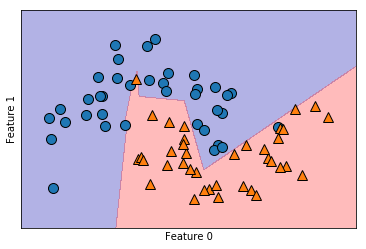

In [81]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(x_train, y_train)
mglearn.plots.plot_2d_separator(mlp, x_train, fill=True, alpha=.3) # hidden unit == 10
mglearn.discrete_scatter(x_train[:, 0], x_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0,0.5,'Feature 1')

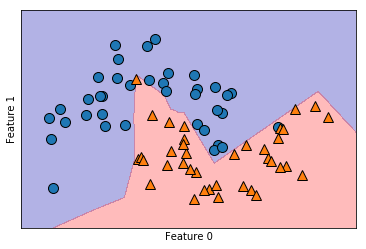

In [82]:
# two hidden layers with 10 units in ReLU function
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(x_train, y_train)
mglearn.plots.plot_2d_separator(mlp, x_train, fill=True, alpha=.3)
mglearn.discrete_scatter(x_train[:, 0], x_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0,0.5,'Feature 1')

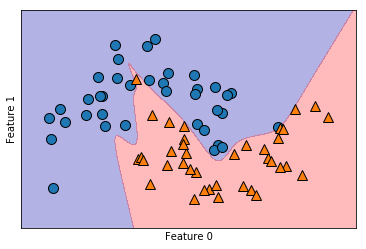

In [83]:
# two hidden layers with 10 units in tanh function
mlp = MLPClassifier(solver='lbfgs', activation='tanh', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(x_train, y_train)
mglearn.plots.plot_2d_separator(mlp, x_train, fill=True, alpha=.3)
mglearn.discrete_scatter(x_train[:, 0], x_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

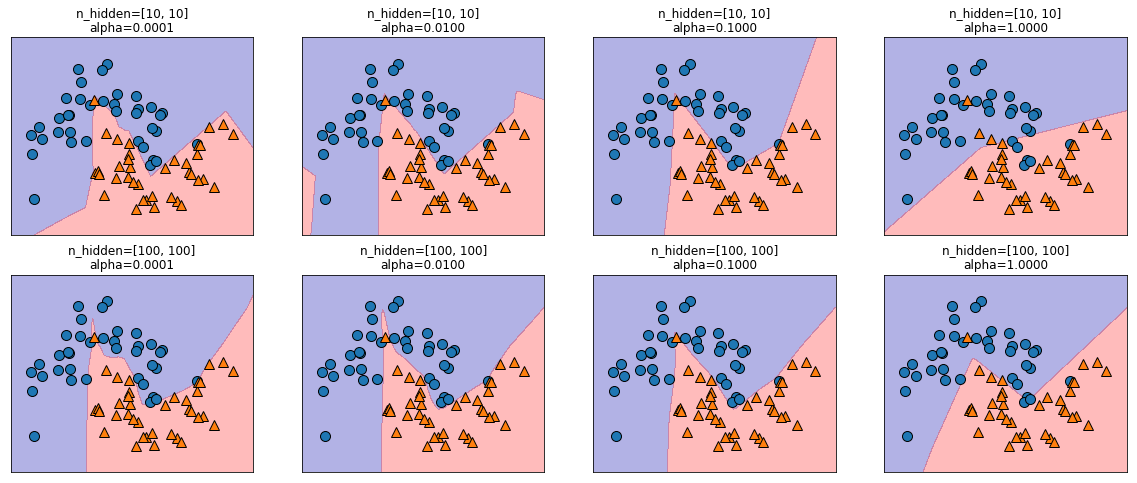

In [84]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], alpha=alpha)
        mlp.fit(x_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, x_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(x_train[:, 0], x_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))

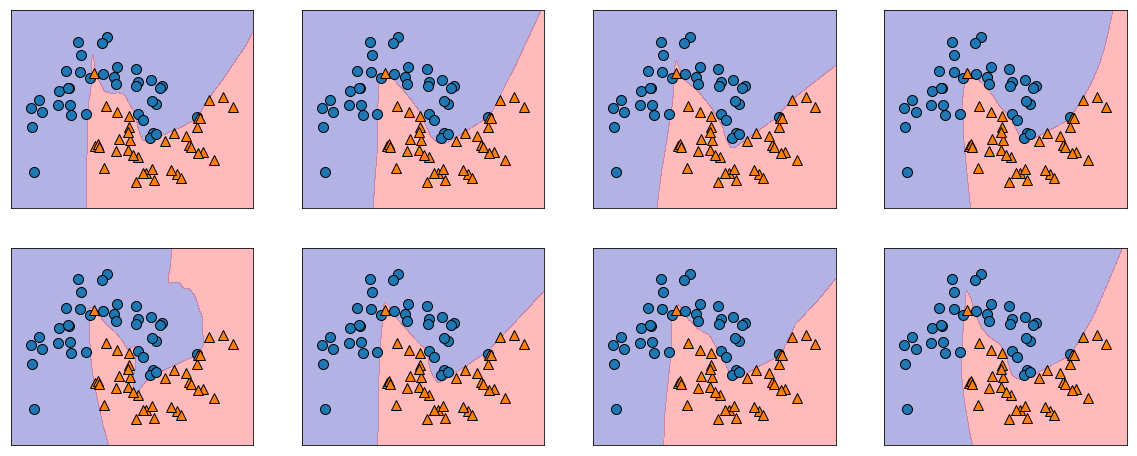

In [87]:
# different initialization
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i, hidden_layer_sizes=[100, 100])
    mlp.fit(x_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, x_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(x_train[:, 0], x_train[:, 1], y_train, ax=ax)

In [88]:
print("유방암 데이터의 특성별 최댓값:\n{}".format(cancer.data.max(axis=0)))

유방암 데이터의 특성별 최댓값:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [89]:
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(x_train, y_train)

print("train set accuracy: {:.2f}".format(mlp.score(x_train, y_train)))
print("test set accuracy: {:.2f}".format(mlp.score(x_test, y_test)))

train set accuracy: 0.91
test set accuracy: 0.88


In [90]:
# Normalization(평군은 0, 분산은 1로)

# get average of each Feature in the train set
mean_on_train = x_train.mean(axis=0)
# get 표준편차 of each Feature in the train set
std_on_train = x_train.std(axis=0)

# 데이터에서 평균을 빼고 표준 편차로 나누면 평균 0, 표준편차 1인 데이터로 변환됨
x_train_scaled = (x_train - mean_on_train) / std_on_train
# normalize the test set
x_test_scaled = (x_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(x_train_scaled, y_train)

print("train set accuracy: {:.3f}".format(mlp.score(x_train_scaled, y_train)))
print("test set accuracy: {:.3f}".format(mlp.score(x_test_scaled, y_test)))

train set accuracy: 0.991
test set accuracy: 0.965


/Users/Jmmmmu/tensorflow/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [91]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(x_train_scaled, y_train)

print("train set accuracy: {:.3f}".format(mlp.score(x_train_scaled, y_train)))
print("test set accuracy: {:.3f}".format(mlp.score(x_test_scaled, y_test)))

train set accuracy: 0.993
test set accuracy: 0.972


In [92]:
# make our model simpler
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0) # default alpha==0.0001
mlp.fit(x_train_scaled, y_train)

print("train set accuracy: {:.3f}".format(mlp.score(x_train_scaled, y_train)))
print("test set accuracy: {:.3f}".format(mlp.score(x_test_scaled, y_test)))

train set accuracy: 0.988
test set accuracy: 0.972


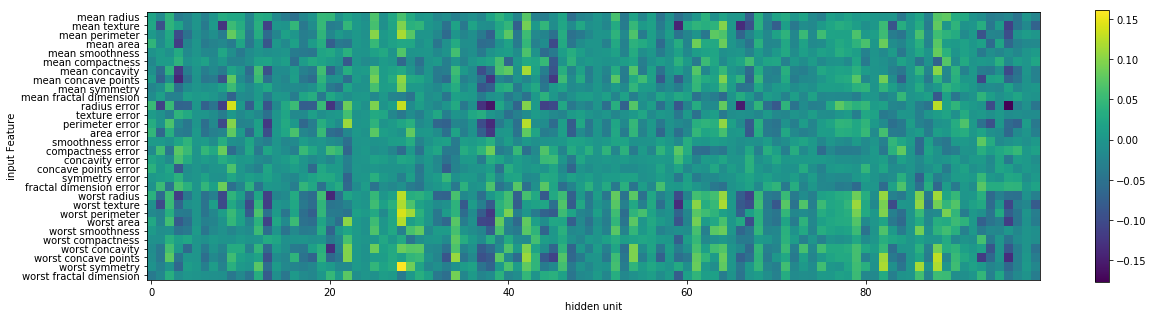

In [93]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("hidden unit")
plt.ylabel("input Feature")
plt.colorbar() # brighter for positive, darker for negative

# Estimating inaccuracy of classifying prediction

In [94]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
x, y = make_circles(noise=0.25, factor=0.5, random_state=1)
# change class name to "blue" and "red"
y_named = np.array(["blue", "red"])[y]

# 여러 배열을 한꺼번에 train_test_split 에 넣는다
x_train, x_test, y_train_named, y_test_named, y_train, y_test = train_test_split(x, y_named, y, random_state=0)

# Make Gradient Boosting Model
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(x_train, y_train_named)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [95]:
print("x_test.shape: {}".format(x_test.shape))
print("결정 함수 결과 형태: {}".format(gbrt.decision_function(x_test).shape))

x_test.shape: (25, 2)
결정 함수 결과 형태: (25,)


In [96]:
# 결정 함수결과 중 앞부분 일부를 확인
print("결정 함수:\n{}".format(gbrt.decision_function(x_test)[:6]))

결정 함수:
[ 4.13592629 -1.7016989  -3.95106099 -3.62599351  4.28986668  3.66166106]


In [97]:
print("임계치와 결정 함수 결과 비교:\n{}".format(gbrt.decision_function(x_test) > 0))
print("예측:\n{}".format(gbrt.predict(x_test)))

임계치와 결정 함수 결과 비교:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
예측:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [101]:
# change boolean value to 0, 1
greater_zero = (gbrt.decision_function(x_test) > 0).astype(int)
# use it as indexes of classes_
pred = gbrt.classes_[greater_zero]
# compare pred with gbrt.predict
print("pred는 예측 결과와 같다: {}".format(np.all(pred == gbrt.predict(x_test))))

pred는 예측 결과와 같다: True


In [103]:
decision_function = gbrt.decision_function(x_test)
print("결정 함수 최솟값: {:.2f} 최댓값: {:.2f}".format(np.min(decision_function), np.max(decision_function)))

결정 함수 최솟값: -7.69 최댓값: 4.29


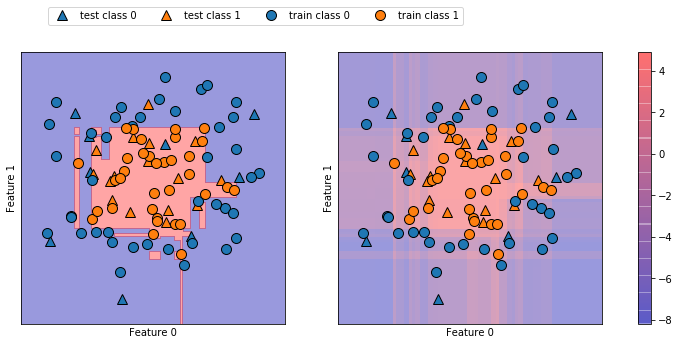

In [109]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, x, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, x, ax=axes[1], alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    # Draw train points and test points
    mglearn.discrete_scatter(x_test[:, 0], x_test[:, 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(x_train[:, 0], x_train[:, 1], y_train, markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["test class 0", "test class 1", "train class 0", "train class 1"], ncol=4, loc=(.1, 1.1))

In [110]:
print("확률 값의 형태: {}".format(gbrt.predict_proba(x_test).shape))

확률 값의 형태: (25, 2)
